In [1]:
import pandas as pd
import sidrapy
from matplotlib import pyplot as plt
import seaborn as sns

from ipca import anual_ipca, monthly_ipca

In [2]:
# Seta a visualização para não cientifica e coloca ',' como separador de milhar
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
colunas_receitas = [
    'EXERCICIO',
    'DESC_ORGAO',
    'CODIGO_RUBRICA',
    'DESC_RUBRICA',
    'RECEITA_PREVISTA',
    'RECEITA_ARRECADADA',
    'JAN',
    'FEV',
    'MAR',
    'ABR',
    'MAI',
    'JUN',
    'JUL',
    'AGO',
    'SET',
    'OUT',
    'NOV',
    'DEZ',
]

Fonde dos dados:
http://www.rio.rj.gov.br/web/contasrio/dados-abertos#titulo

Receitas: http://riotransparente.rio.rj.gov.br/arquivos/Open_Data_Rec.csv

Despesas: http://riotransparente.rio.rj.gov.br/arquivos/Open_Data_Desp.csv

In [6]:
df_receitas = pd.read_csv('data/Open_Data_Rec.csv', encoding='latin1', names=colunas_receitas, header=0, decimal=',')

In [8]:
df_despesas = pd.read_csv('data/Open_Data_Desp.csv', encoding='latin1', decimal=',')

In [9]:
df_despesas

,Exercicio,Orgao,Unidade_Orcamentaria,Programa_de_Trabalho,Acao,Descricao_Acao,Elemento_Despesa,Descricao_Elemento,Empenhado,Pago,Fonte_de_Recursos,Descricao_Fonte,Item_Despesa,Descricao_Item_Despesa,Orcamento_Atualizado,Liquidado,Pago_Restos_Pagar
0,2008,10,1,10.01.04.122.0001.2002,2002,APOIO ADMINISTRATIVO,39,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA,0.00,0.00,100,100 - ORDINARIOS NAO VINCULADOS,33903913,"SERVICOS DE TRANSPORTE, FRETE E CARRETOS ...",0.00,0.00,"1,112,401.67"
1,2008,10,1,10.01.04.122.0001.2002,2002,APOIO ADMINISTRATIVO,39,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA,0.00,0.00,100,100 - ORDINARIOS NAO VINCULADOS,33903926,SERVICOS DE TELEFONIA ...,0.00,0.00,"298,205.07"
2,2008,10,1,10.01.04.122.0001.2002,2002,APOIO ADMINISTRATIVO,39,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA...,0.00,0.00,100,100 - ORDINARIOS NAO VINCULADOS,33913900,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA...,"16,700.00",0.00,0.00
3,2008,10,1,10.01.04.122.0001.2002,2002,APOIO ADMINISTRATIVO,52,EQUIPAMENTOS E MATERIAL PERMANENTE ...,0.00,0.00,100,100 - ORDINARIOS NAO VINCULADOS,44905200,EQUIPAMENTOS E MATERIAL PERMANENTE ...,0.00,0.00,0.00
4,2008,10,1,10.01.04.122.0001.2331,2331,DESPESAS OBRIGATORIAS E OUTROS CUSTEIOS - ADMI...,39,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA...,"1,690,203.38","1,471,907.96",100,100 - ORDINARIOS NAO VINCULADOS,33903923,VALE-REFEICAO E VALE ALIMENTACAO ...,0.00,"1,471,907.96",0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248647,2023,56,51,56.51.04.122.0389.4529,4529,PROVISAO DE GASTOS COM PESSOAL - ADM. INDIRETA...,11,VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL ...,"202,900.65",0.00,1500100,1500100 - RECURSOS NAO VINCULADOS DE IMP,31901153,ADIANTAMENTO 13 SALARIO - CLT ...,0.00,"202,900.65",0.00
248648,2023,56,51,56.51.04.122.0389.4529,4529,PROVISAO DE GASTOS COM PESSOAL - ADM. INDIRETA...,16,OUTRAS DESPESAS VARIAVEIS - PESSOAL CIVIL ...,"145,003.69","105,072.60",1500100,1500100 - RECURSOS NAO VINCULADOS DE IMP,31901613,EMPRESTIMO DE FERIAS ...,0.00,"145,003.69","105,072.60"
248649,2023,56,51,56.51.04.122.0389.4529,4529,PROVISAO DE GASTOS COM PESSOAL - ADM. INDIRETA...,92,DESPESAS DE EXERCICIOS ANTERIORES ...,0.00,0.00,1500100,1500100 - RECURSOS NAO VINCULADOS DE IMP,31909200,DESPESAS DE EXERCICIOS ANTERIORES ...,"15,000.00",0.00,0.00
248650,2023,56,51,56.51.04.126.0389.4769,4769,MANUTENCAO E DESENVOLVIMENTO DA INFORMATICA - ...,40,SERVICOS DE TECNOLOGIA DA INFORMACAO E COMUNIC...,0.00,0.00,1500100,1500100 - RECURSOS NAO VINCULADOS DE IMP,33904000,SERVICOS DE TECNOLOGIA DA INFORMACAO E COMUNIC...,"5,331,738.00",0.00,0.00


# Análise das receitas do FUNDEB

In [8]:
# Cria df apenas com dados referentes ao FUNDEB
fundeb = df_receitas[df_receitas['DESC_RUBRICA'].str.contains('FUNDEB')]

In [9]:
fundeb['DESC_RUBRICA'].unique()

array(['TRANSFERENCIAS DE RECURSOS DO FUNDEB - PARCELA ITR',
       'TRANSFERENCIAS DE RECURSOS DO FUNDEB - PARCELA IPI-EX',
       'ANULACAO DE DESPESAS - FUNDEF/FUNDEB',
       'TRANSFERENCIAS DE RECURSOS DO FUNDEB - PARCELA FPE',
       'TRANSFERENCIAS DE RECURSOS DO FUNDEB - PARCELA IPVA',
       'TRANSFERENCIAS DE RECURSOS DO FUNDEB - PARCELA FPM',
       'TRANSFERENCIAS DE RECURSOS DO FUNDEB - PARCELA ICMS',
       'TRANSFERENCIAS DE RECURSOS DO FUNDEB - PARCELA ITCM',
       'RECURSOS DO FUNDEF/FUNDEB',
       'TRANSFERENCIAS DE RECURSOS DO FUNDEB - PARCELA LC 87/96',
       'TRANSFERENCIAS DE RECURSOS DO FUNDEB - PARCELA AJ FEB P1360-A',
       'RECEITA DE REMUNERACAO DE DEPOSITOS DE RECURSOS VINCULADOS - FUNDEB',
       'RECUPERACAO DE DESPESAS DE EXERCICIOS ANTERIORES - FUNDEB',
       'TRANSFERENCIAS DE RECURSOS DO FUNDEB - PARCELA FPM - APOIO MP 815/2017',
       'FUNDEB', 'DESCONTOS OBTIDOS - FUNDEB - FUNDEF',
       'MULTAS POR INFRACOES CONTRATUAIS - FUNDEB - FUNDEF',
  

In [10]:
colunas = ['RECEITA_PREVISTA','RECEITA_ARRECADADA',
           'JAN', 'FEV',
           'MAR', 'ABR',
           'MAI', 'JUN',
           'JUL', 'AGO',
           'SET', 'OUT',
           'NOV', 'DEZ']
fundeb_agg = fundeb.groupby(by='EXERCICIO')[colunas].sum().astype('float').reset_index()

## FUNDEB anual

In [11]:
fundeb_anual = fundeb_agg[['EXERCICIO','RECEITA_PREVISTA','RECEITA_ARRECADADA']]

In [12]:
ipca_anual = anual_ipca()

In [13]:
fundeb_anual = pd.merge(fundeb_anual, ipca_anual[['year','relative_index']], left_on='EXERCICIO', right_on='year', how='left')

In [14]:
fundeb_anual = fundeb_anual.assign(RECEITA_PREVISTA_DEF = fundeb_anual.RECEITA_PREVISTA / fundeb_anual.relative_index,
                                   RECEITA_ARRECADADA_DEF = fundeb_anual.RECEITA_ARRECADADA / fundeb_anual.relative_index,
                                   DIFERENCA = (fundeb_anual.RECEITA_ARRECADADA / fundeb_anual.RECEITA_PREVISTA - 1) * 100)

In [15]:
fundeb_anual

,EXERCICIO,RECEITA_PREVISTA,RECEITA_ARRECADADA,year,relative_index,RECEITA_PREVISTA_DEF,RECEITA_ARRECADADA_DEF,DIFERENCA
0,2008,"887,873,029.00","1,019,265,926.59","2,008.00",0.45,"1,987,324,893.53","2,281,421,422.74",14.80
1,2009,"1,139,040,915.00","1,112,784,510.41","2,009.00",0.47,"2,444,169,881.07","2,387,828,521.92",-2.31
2,2010,"1,192,455,125.00","1,321,024,179.76","2,010.00",0.49,"2,416,001,168.76","2,676,491,463.16",10.78
3,2011,"1,407,749,749.00","1,490,475,586.30","2,011.00",0.53,"2,678,125,633.84","2,835,504,589.59",5.88
4,2012,"1,599,685,382.00","1,703,244,543.60","2,012.00",0.56,"2,875,346,798.29","3,061,488,715.37",6.47
5,2013,"1,814,340,345.00","2,041,753,731.75","2,013.00",0.59,"3,079,196,798.63","3,465,150,059.48",12.53
6,2014,"2,209,182,288.00","2,155,095,234.23","2,014.00",0.63,"3,523,447,444.99","3,437,183,449.28",-2.45
7,2015,"2,373,030,290.00","2,209,192,465.26","2,015.00",0.69,"3,419,870,155.03","3,183,756,823.71",-6.90
8,2016,"2,317,601,180.00","2,220,526,881.65","2,016.00",0.74,"3,142,336,078.17","3,010,717,198.87",-4.19
9,2017,"2,518,000,857.00","2,280,697,405.38","2,017.00",0.76,"3,316,220,892.22","3,003,690,949.32",-9.42


In [16]:
columns = ['RECEITA_PREVISTA', 'RECEITA_ARRECADADA']
fundeb_anual_precos_correntes = pd.melt(frame=fundeb_anual, id_vars=['EXERCICIO'],value_vars=columns).sort_values('EXERCICIO')

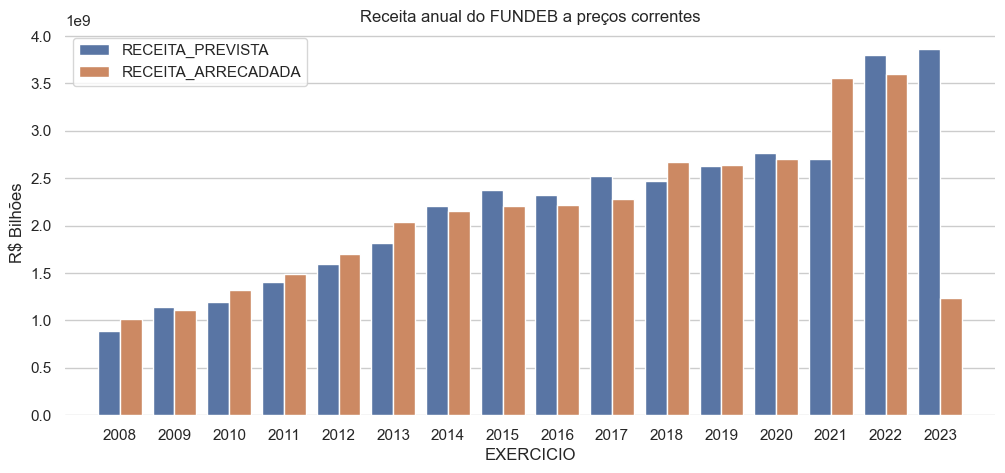

In [17]:
# Grafico 1 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 5))

sns.set_color_codes("pastel")
sns.barplot(x="EXERCICIO",
            y="value",
            hue='variable',
            data=fundeb_anual_precos_correntes)


ax.set(xlim=(-1, 16),
       ylabel="R$ Bilhões",
       title='Receita anual do FUNDEB a preços correntes')
sns.despine(left=True, bottom=True)
plt.legend(title='')
plt.show()

In [18]:
columns = ['RECEITA_PREVISTA_DEF', 'RECEITA_ARRECADADA_DEF']
fundeb_anual_precos_constantes = pd.melt(frame=fundeb_anual, id_vars=['EXERCICIO'],value_vars=columns).sort_values('EXERCICIO')

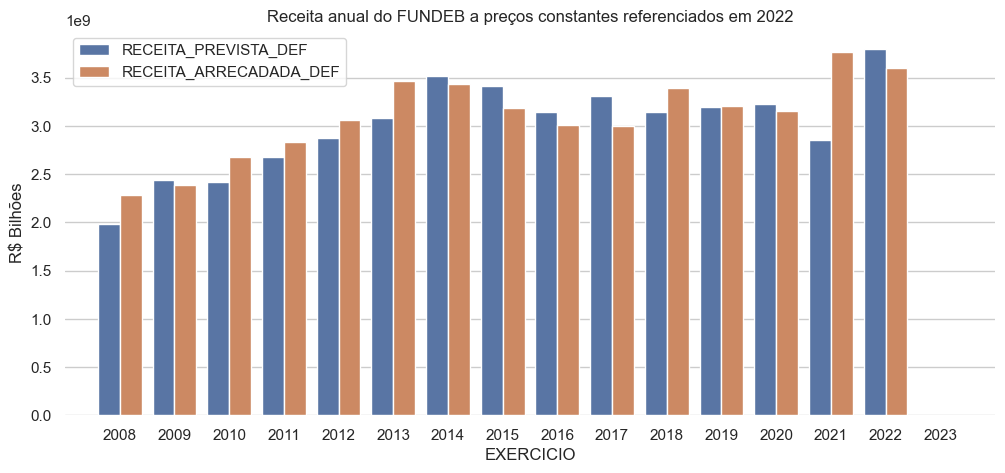

In [19]:
# Grafico 2

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 5))

sns.set_color_codes("dark")
sns.barplot(x="EXERCICIO",
            y="value",
            hue='variable',
            data=fundeb_anual_precos_constantes)


ax.set(xlim=(-1, 16),
       ylabel="R$ Bilhões",
       title='Receita anual do FUNDEB a preços constantes referenciados em 2022')
sns.despine(left=True, bottom=True)
plt.legend(title='')
plt.show()

In [20]:
fundeb_dif = fundeb_anual[['EXERCICIO', 'DIFERENCA']]
fundeb_dif = fundeb_dif[fundeb_dif['EXERCICIO']!=2023]

In [21]:
fundeb_dif.DIFERENCA.mean()

3.8624360800634188

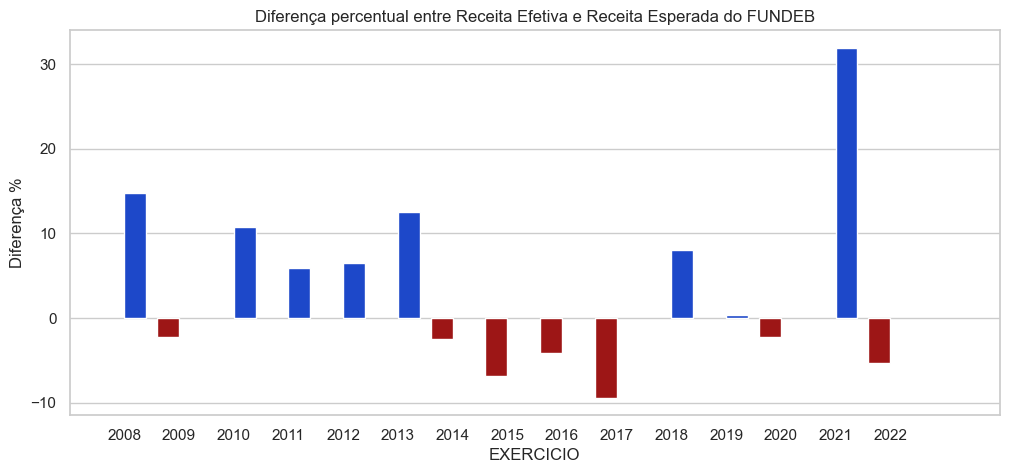

In [22]:
# Grafico 3
sns.set_color_codes("pastel")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 5))
colors = [1 if c >= 0 else 0 for c in fundeb_dif.DIFERENCA]
color_map = ['#b30000', '#0039e6']

sns.barplot(
    x='EXERCICIO',
    y='DIFERENCA',
    data=fundeb_dif,
    hue=colors,
    palette=sns.color_palette(color_map, as_cmap=False),
)
ax.set(xlim=(-1, 16),
       ylabel="Diferença %",
       title='Diferença percentual entre Receita Efetiva e Receita Esperada do FUNDEB',
       )
plt.legend([], [], frameon=False)
plt.show()

# FUNDEB mensal

In [23]:
fundeb_mensal = fundeb_agg.drop(columns=['RECEITA_PREVISTA','RECEITA_ARRECADADA'])

In [24]:
columns = ['JAN', 'FEV',
           'MAR', 'ABR',
           'MAI', 'JUN',
           'JUL', 'AGO',
           'SET', 'OUT',
           'NOV', 'DEZ']

In [25]:
fundeb_tidy = pd.melt(frame=fundeb_mensal, id_vars=['EXERCICIO'],value_vars=columns).sort_values('EXERCICIO')

In [26]:
fundeb_mensal_constante = pd.merge(fundeb_tidy, ipca_anual[['year','relative_index']], left_on='EXERCICIO', right_on='year', how='left')

In [27]:
fundeb_mensal_constante = fundeb_mensal_constante.assign(value_def = fundeb_mensal_constante.value / fundeb_mensal_constante.relative_index)

In [28]:
fundeb_mensal_constante = pd.merge(fundeb_mensal_constante, fundeb_anual[['EXERCICIO', 'RECEITA_ARRECADADA']], on='EXERCICIO')

In [29]:
fundeb_mensal_constante = fundeb_mensal_constante.assign(value_def = fundeb_mensal_constante.value / fundeb_mensal_constante.relative_index,
                                                         percentual = (fundeb_mensal_constante.value / fundeb_mensal_constante.RECEITA_ARRECADADA) * 100)

In [30]:
fundeb_mensal_constante.tail(12)

,EXERCICIO,variable,value,year,relative_index,value_def,RECEITA_ARRECADADA,percentual
180,2023,JUN,0.00,NaN,NaN,NaN,"1,232,967,206.53",0.00
181,2023,OUT,0.00,NaN,NaN,NaN,"1,232,967,206.53",0.00
182,2023,SET,0.00,NaN,NaN,NaN,"1,232,967,206.53",0.00
183,2023,AGO,0.00,NaN,NaN,NaN,"1,232,967,206.53",0.00
184,2023,JUL,0.00,NaN,NaN,NaN,"1,232,967,206.53",0.00
185,2023,MAI,0.00,NaN,NaN,NaN,"1,232,967,206.53",0.00
186,2023,ABR,"235,463,706.50",NaN,NaN,NaN,"1,232,967,206.53",19.10
187,2023,MAR,"308,796,950.18",NaN,NaN,NaN,"1,232,967,206.53",25.05
188,2023,FEV,"323,025,134.19",NaN,NaN,NaN,"1,232,967,206.53",26.20
189,2023,JAN,"365,681,415.66",NaN,NaN,NaN,"1,232,967,206.53",29.66


In [31]:
mensal_mean = fundeb_mensal_constante.value_def.mean()
mensal_mean

258153377.61171103

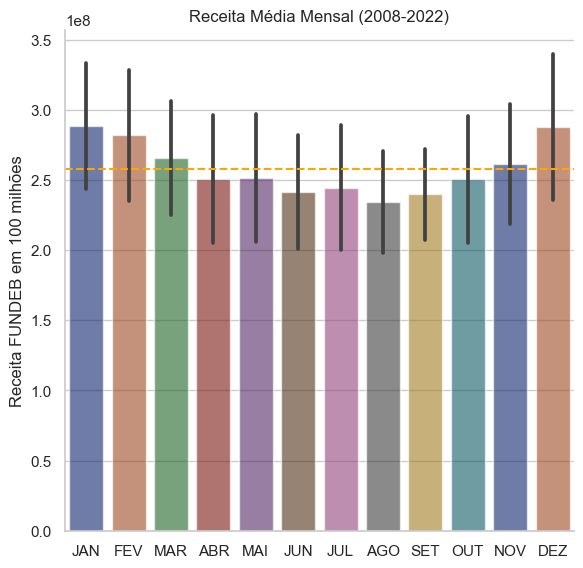

In [32]:
# Grafico 4
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=fundeb_mensal_constante, kind="bar",
    x="variable", y="value_def", order=columns,
    errorbar="sd", palette="dark", alpha=.6, height=6,
)

g.set_axis_labels("", "Receita FUNDEB em 100 milhões")
g.set(title='Receita Média Mensal (2008-2022)')

ax = g.ax
ax.axhline(mensal_mean, ls='--', color='orange')

                  
plt.show()

In [33]:
media_mensal = (
    fundeb_mensal_constante
    .groupby('variable')[['value_def','percentual']].mean()
    .reindex(columns)
)

In [34]:
media_mensal

,value_def,percentual
variable,,
JAN,"288,325,031.55",10.58
FEV,"281,749,720.25",10.15
MAR,"265,716,777.45",9.62
ABR,"250,691,889.75",8.74
MAI,"251,567,715.46",7.61
JUN,"241,386,846.97",7.33
JUL,"244,484,824.65",7.38
AGO,"234,507,728.96",7.10
SET,"239,758,916.14",7.29


In [35]:
# Fazer no excel a previsão para 2023 baseado no percenual acima

# Análise despesas em Educação Infantil e Educação Especial

In [39]:
#dicionario = pd.read_csv('data/dicionario_dados.csv')

In [40]:
# Cria df apenas com dados referentes a EDUCACAO
#teste = dicionario[dicionario['NomeOrgao'].str.contains('duca')]

In [41]:
# Secretaria de Educação: Orgão 16

In [42]:
df_educacao = df_despesas[df_despesas['Orgao']==16]

Justificativa metodológica para utilização de 'Liquidado' para análise das despesas

"A Lei nº 4.320, de 17 de março de 1964, distingue
dois conceitos fundamentais utilizados na execução
orçamentária: o empenho e a liquidação. O empenho
corresponde à emissão de uma nota pela qual o
ordenador da despesa se compromete a realizá-la;
no caso dos investimentos, é o sinal para que se
proceda ao processo de licitação tendo em vista a
contratação de um serviço ou a aquisição de um bem
ou equipamento ou, eventualmente, a assinatura de
um convênio com outro ente para que ele mesmo
realize tal despesa.
A liquidação, por outro lado, é definida no
artigo 63 da referida lei e corresponde ao estágio da
execução orçamentária em que o governo verifica “o
direito adquirido pelo credor” tendo por base “os
comprovantes da entrega de material ou da prestação
efetiva do serviço”. Ou seja, há uma nítida distinção
entre empenho e liquidação, não justificando-se que
ao final do exercício se considerem realizadas todas
as despesas empenhadas, sobretudo no caso dos
investimentos, em que se verifica considerável lapso
de tempo entre o empenho e a conclusão da obra,
mesmo quando executada por trechos."

url = https://revista.tcu.gov.br/ojs/index.php/RTCU/article/view/511/561

In [43]:
df_educacao

,Exercicio,Orgao,Unidade_Orcamentaria,Programa_de_Trabalho,Acao,Descricao_Acao,Elemento_Despesa,Descricao_Elemento,Empenhado,Pago,Fonte_de_Recursos,Descricao_Fonte,Item_Despesa,Descricao_Item_Despesa,Orcamento_Atualizado,Liquidado,Pago_Restos_Pagar
461,2008,16,1,16.01.12.361.0001.2002,2002,APOIO ADMINISTRATIVO,14,DIARIAS - CIVIL ...,"230,000.00","163,618.77",100,100 - ORDINARIOS NAO VINCULADOS,33901401,DIARIAS ...,0.00,"163,618.77","166,168.77"
462,2008,16,1,16.01.12.361.0001.2002,2002,APOIO ADMINISTRATIVO,30,MATERIAL DE CONSUMO ...,0.00,0.00,100,100 - ORDINARIOS NAO VINCULADOS,33903000,MATERIAL DE CONSUMO ...,"1,356,000.00",0.00,0.00
463,2008,16,1,16.01.12.361.0001.2002,2002,APOIO ADMINISTRATIVO,39,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA,0.00,0.00,100,100 - ORDINARIOS NAO VINCULADOS,33903905,"SERVICOS DE COPIAS, REPRODUCOES E RECARGAS ...",0.00,0.00,"40,824.86"
464,2008,16,1,16.01.12.361.0001.2002,2002,APOIO ADMINISTRATIVO,39,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA,0.00,0.00,100,100 - ORDINARIOS NAO VINCULADOS,33903934,DESPESAS MIUDAS DE PRONTO PAGAMENTO E/OU DE CA...,0.00,0.00,"26,305.76"
465,2008,16,1,16.01.12.361.0001.2002,2002,APOIO ADMINISTRATIVO,39,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA...,"170,000.00","148,335.43",100,100 - ORDINARIOS NAO VINCULADOS,33903939,TICKET COMBUSTIVEL ...,0.00,"148,335.43",0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247412,2023,16,51,16.51.12.361.0381.4521,4521,PROVISAO DE GASTOS COM PESSOAL - ADM. INDIRETA...,11,VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL ...,0.00,0.00,117,117 - ORDINARIOS NAO VINCULADOS - RE,31901148,GRATIFICACAO DE FUNCAO DE CONFIANCA - CLT ...,0.00,0.00,"409,568.56"
247413,2023,16,51,16.51.12.361.0381.4521,4521,PROVISAO DE GASTOS COM PESSOAL - ADM. INDIRETA...,11,VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL ...,"657,540.92","381,851.58",1500117,1500117 - RECURSOS NAO VINCULADOS DE IMP,31901148,GRATIFICACAO DE FUNCAO DE CONFIANCA - CLT ...,0.00,"657,540.92","381,851.58"
247414,2023,16,51,16.51.12.361.0381.4521,4521,PROVISAO DE GASTOS COM PESSOAL - ADM. INDIRETA...,11,VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL ...,0.00,0.00,117,117 - ORDINARIOS NAO VINCULADOS - RE,31901149,HONORARIOS DE DIRETORES ...,0.00,0.00,"68,570.76"
247415,2023,16,51,16.51.12.361.0381.4521,4521,PROVISAO DE GASTOS COM PESSOAL - ADM. INDIRETA...,92,DESPESAS DE EXERCICIOS ANTERIORES ...,0.00,0.00,1500117,1500117 - RECURSOS NAO VINCULADOS DE IMP,31909200,DESPESAS DE EXERCICIOS ANTERIORES ...,"53,000.00",0.00,0.00


# Analise da despesa por fonte de custeio

In [58]:
educacao_fonte = (
    df_educacao
    .groupby(['Descricao_Acao','Descricao_Fonte','Elemento_Despesa'])
    .agg({
        'Descricao_Elemento' : 'first',
        'Orcamento_Atualizado': 'sum', 
        'Empenhado': 'sum',
        'Liquidado': 'sum',
        'Pago': 'sum'
    })
    .reset_index()
)

In [59]:
educacao_fonte[educacao_fonte['Descricao_Fonte']=='142 - FUNDEB']

,Descricao_Acao,Descricao_Fonte,Elemento_Despesa,Descricao_Elemento,Orcamento_Atualizado,Empenhado,Liquidado,Pago
4,ACAO PREVENTIVA ORIENTADA PARA SEGURANCA,142 - FUNDEB,39,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA,"33,764,895.87","33,749,640.46","33,622,450.36","31,876,596.79"
16,ALFABETIZACAO NO PRIMEIRO E SEGUNDO ANO,142 - FUNDEB,30,MATERIAL DE CONSUMO ...,"315,299.00","149,079.86","149,079.86","149,079.86"
17,ALFABETIZACAO NO PRIMEIRO E SEGUNDO ANO,142 - FUNDEB,36,OUTROS SERVICOS DE TERCEIROS - PESSOA FISICA ...,"26,552.00","6,152.00","6,152.00","5,864.00"
18,ALFABETIZACAO NO PRIMEIRO E SEGUNDO ANO,142 - FUNDEB,39,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA...,"1,713,601.00","852,600.01","852,600.01","852,600.01"
35,APOIO ADMINISTRATIVO,142 - FUNDEB,30,MATERIAL DE CONSUMO ...,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
2020,"RIO, UMA CIDADE DE LEITORES",142 - FUNDEB,36,OUTROS SERVICOS DE TERCEIROS - PESSOA FISICA ...,"11,172.00",0.00,0.00,0.00
2021,"RIO, UMA CIDADE DE LEITORES",142 - FUNDEB,39,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA,"5,713,908.00","3,863,543.59","3,842,730.52","3,277,143.73"
2022,"RIO, UMA CIDADE DE LEITORES",142 - FUNDEB,47,OBRIGACOES TRIBUTARIAS E CONTRIBUTIVAS ...,"3,894.00",0.00,0.00,0.00
2023,"RIO, UMA CIDADE DE LEITORES",142 - FUNDEB,52,EQUIPAMENTOS E MATERIAL PERMANENTE ...,"645,754.00","343,168.00","343,168.00",0.00


In [48]:
educacao_fonte.Descricao_Elemento.unique()

array(['OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA                                            ',
       'OUTROS SERVICOS DE TERCEIROS  - PESSOA JURIDICA',
       'OBRAS E INSTALACOES                                                                       ',
       'OUTROS SERVICOS DE TERCEIROS  - PESSOA JURIDICA                                           ',
       'MATERIAL DE CONSUMO                                                                       ',
       'OUTROS SERVICOS DE TERCEIROS - PESSOA FISICA                                              ',
       'DESPESAS DE EXERCICIOS ANTERIORES                                                         ',
       'DIARIAS - CIVIL                                                                           ',
       'EQUIPAMENTOS E MATERIAL PERMANENTE                                                        ',
       'LOCACAO DE MAO-DE-OBRA                                                                    ',
       'MATERIAL DE DISTRIBUICAO 

## Analise histórica dos gastos em educação

In [ ]:
educacao_anual = (
    df_educacao
    .groupby(['Exercicio'])
    .agg({'Orcamento_Atualizado': 'sum', 
          'Empenhado': 'sum',
          'Liquidado': 'sum',
          'Pago': 'sum'})
    .reset_index()
)

In [ ]:
ipca_anual.columns

In [ ]:
educacao_anual = pd.merge(educacao_anual, ipca_anual[['year','relative_index']], left_on='Exercicio', right_on='year', how='left')

In [ ]:
educacao_anual = educacao_anual.assign(Orcamento_Atualizado_def = educacao_anual.Orcamento_Atualizado / educacao_anual.relative_index,
                                       Empenhado_def = educacao_anual.Empenhado / educacao_anual.relative_index,
                                       Liquidado_def = educacao_anual.Liquidado / educacao_anual.relative_index,
                                       Pago_def = educacao_anual.Pago / educacao_anual.relative_index,)

In [ ]:
educacao_anual

### Despesas anuais da Educação

In [ ]:
# Grafico 5

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(11,5))

# Plot the Orcamento_Atualizado
sns.set_color_codes("pastel")
sns.barplot(x="Exercicio", y="Orcamento_Atualizado", data=educacao_anual,
            label="LOA", color="b")


sns.set_color_codes("muted")
sns.barplot(x="Exercicio", y="Liquidado", data=educacao_anual,
            label="Despesas Liquidadas", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=False)
ax.set(xlim=(-1, 16),
       ylabel="R$ Bilhões",
       xlabel='',
       title='Despesas em Educação a Preços Correntes',)
plt.ticklabel_format(style='sci', axis='y')
sns.despine(left=True, bottom=True)

In [ ]:
# Grafico 6

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(11,5))

# Plot the Orcamento_Atualizado
sns.set_color_codes("pastel")
sns.barplot(x="Exercicio", y="Orcamento_Atualizado_def", data=educacao_anual,
            label="LOA", color="b")


sns.set_color_codes("muted")
sns.barplot(x="Exercicio", y="Liquidado_def", data=educacao_anual,
            label="Despesas Liquidadas", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=False)
ax.set(xlim=(-1, 16),
       ylabel="R$ Bilhões",
       xlabel='',
       title='Despesas em Educação a Preços Constantes de 2022',)

plt.ticklabel_format(style='sci', axis='y', scilimits=(9,9))
sns.despine(left=True, bottom=True)

### Composição das despesas em educação no ano de 2022

In [ ]:
educacao_2022 = (
    df_educacao
    .query('Exercicio == 2022')
    .groupby(['Descricao_Acao', 'Descricao_Elemento'])
    .agg({
        'Orcamento_Atualizado': 'sum', 
        'Empenhado': 'sum',
        'Liquidado': 'sum',
        'Pago': 'sum'
    })
    .reset_index()
)

In [ ]:
educacao_2022

In [ ]:
educacao_2022_acao = (
    educacao_2022
    .query('Empenhado > 0')
    .groupby(['Descricao_Acao'])
    .agg({
        'Orcamento_Atualizado': 'sum', 
        'Empenhado': 'sum',
        'Liquidado': 'sum',
        'Pago': 'sum'
    })
    .reset_index()
)

In [ ]:
educacao_2022_acao = educacao_2022_acao.sort_values('Orcamento_Atualizado', ascending=False)

In [ ]:
educacao_2022_acao = (
    educacao_2022_acao.
    assign(pessoal = educacao_2022_acao['Descricao_Acao'].str.contains('PESSOAL'))
)

In [ ]:
educacao_pessoal = (
    educacao_2022_acao
    .groupby('pessoal')
    .agg({'Orcamento_Atualizado': 'sum'})
    .reset_index()
)

In [ ]:
educacao_pessoal = educacao_pessoal.assign(percentual=(educacao_pessoal.Orcamento_Atualizado / educacao_pessoal.Orcamento_Atualizado.sum())*100)


In [ ]:
educacao_pessoal

In [ ]:
# Grafico 7
f, ax = plt.subplots(figsize=(4,4))
plt.pie(
    educacao_pessoal.Orcamento_Atualizado,
    labels = ['Outros', 'Pessoal'],
    startangle = 0,
    explode = [0, 0.1],
    shadow = True,
    autopct='%1.0f%%'
    
)
ax.set(title='Composição das despesas de Educação 2022')
plt.show() 

In [ ]:
df_educacao = (
    df_educacao
    .groupby(['Exercicio','Descricao_Acao'])
    .agg({
        'Orcamento_Atualizado': 'sum', 
        'Empenhado': 'sum',
        'Liquidado': 'sum',
        'Pago': 'sum'
    })
    .reset_index()
)

In [ ]:
educacao_acao = (
    df_educacao
    .query('Empenhado > 0')
    .groupby(['Exercicio','Descricao_Acao'])
    .agg({
        'Orcamento_Atualizado': 'sum', 
        'Empenhado': 'sum',
        'Liquidado': 'sum',
        'Pago': 'sum'
    })
    .reset_index()
)

In [ ]:
educacao_acao = (
    educacao_acao
    .assign(pessoal = educacao_acao['Descricao_Acao'].str.contains('PESSOAL'))
)

In [ ]:
educacao_acao

In [ ]:
educacao_pessoal = (
    educacao_acao
    .groupby(['Exercicio','pessoal'])
    .agg({'Liquidado': 'sum'})
    .reset_index()
)

In [ ]:
educacao_pessoal

In [ ]:
anos = [2008, 2013, 2018, 2022]
df_list = []

for ano in anos:
    df = (
        educacao_pessoal
        .query('Exercicio == @ano')
        .groupby('pessoal')
        .agg({'Liquidado': 'sum'})
        .reset_index()
    )
    df = df.assign(percentual = (df.Liquidado / df.Liquidado.sum()) * 100)
    df_list.append(df)

In [ ]:
df_list[3]

In [ ]:
# Grafico 8
anos = [2008, 2013, 2018, 2022]


fig, ax = plt.subplots(2,2,figsize=(4,6))
ax1, ax2, ax3, ax4 = ax[0][0], ax[0][1], ax[1][0], ax[1][1]

ax1.pie(
    df_list[0].Liquidado,
    labels = ['Outros', 'Pessoal'],
    startangle = 0,
    explode = [0, 0.1],
    shadow = True,
    autopct='%1.0f%%'
)

ax2.pie(
    df_list[1].Liquidado,
    startangle = 0,
    explode = [0, 0.1],
    shadow = True,
    autopct='%1.0f%%'
)

ax3.pie(
    df_list[2].Liquidado,
    startangle = 0,
    explode = [0, 0.1],
    shadow = True,
    autopct='%1.0f%%'
)

ax4.pie(
    df_list[3].Liquidado,
    startangle = 0,
    explode = [0, 0.1],
    shadow = True,
    autopct='%1.0f%%'
)
ax1.title.set_text(f'{anos[0]}')
ax2.title.set_text(f'{anos[1]}')
ax3.title.set_text(f'{anos[2]}')
ax4.title.set_text(f'{anos[3]}')
fig.suptitle('Educação: proporção entre gastos com pessoal e outros gastos', fontsize=16)
plt.show() 

In [ ]:
educacao2022_acao_detalhado= (
    educacao_acao
    .query('(Exercicio == 2022) & (pessoal == False) & (Empenhado > 0)')
).sort_values('Orcamento_Atualizado', ascending=False)

In [ ]:
educacao2022_acao_detalhado

In [ ]:
educacao2022_acao_detalhado.to_csv('educacao2022_acao_detalhado.csv', index=False)

In [ ]:
# Grafico 9

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7,8))

# Plot the Orcamento_Atualizado
sns.set_color_codes("pastel")
sns.barplot(x="Orcamento_Atualizado", y="Descricao_Acao", data=educacao2022_acao_detalhado,
            label="LOA", color="b",)


sns.set_color_codes("muted")
sns.barplot(x="Liquidado", y="Descricao_Acao", data=educacao2022_acao_detalhado,
            label="Despesas Liquidadas", color="b")


# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=False)
ax.set(
       ylabel="",
       xlabel='R$ Milhões',
)
plt.title('Despesas Liquidadas em Educação em 2022 - exceto pessoal', x=0)
plt.tick_params(labelsize=8)
plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
sns.despine(left=True, bottom=True)

In [ ]:
educacao2023_acao_detalhado= (
    educacao_acao
    .query('(Exercicio == 2023) & (pessoal == False) & (Empenhado > 0)')
).sort_values('Orcamento_Atualizado', ascending=False)

In [ ]:
educacao2023_acao_detalhado.to_csv('educacao2023_acao_detalhado.csv', index=False)

In [ ]:
# Grafico 10

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7,8))

# Plot the Orcamento_Atualizado
sns.set_color_codes("pastel")
sns.barplot(x="Orcamento_Atualizado", y="Descricao_Acao", data=educacao2023_acao_detalhado,
            label="LOA", color="b",)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Liquidado", y="Descricao_Acao", data=educacao2023_acao_detalhado,
            label="Despesas Liquidadas", color="b")


# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=False)
ax.set(
       ylabel="",
       xlabel='R$ Milhões')
plt.title('Despesas Liquidadas em Educação em 2023 - exceto pessoal', x=0)
plt.tick_params(labelsize=8)
plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
sns.despine(left=True, bottom=True)

In [ ]:
# Grafico 11

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7,8))

# Plot the Orcamento_Atualizado
sns.set_color_codes("pastel")
sns.barplot(x="Orcamento_Atualizado", y="Descricao_Acao", data=educacao2023_acao_detalhado,
            label="LOA", color="b",)


sns.set_color_codes("muted")
sns.barplot(x="Empenhado", y="Descricao_Acao", data=educacao2023_acao_detalhado,
            label="Despesas Empenhadas", color="r")


# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=False)
ax.set(
       ylabel="",
       xlabel='R$ Milhões')
plt.title('Despesas Empenhadas em Educação em 2023 - exceto pessoal', x=0)
plt.tick_params(labelsize=8)
plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
sns.despine(left=True, bottom=True)

In [ ]:
# Grafico 12

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7,8))

# Plot the Orcamento_Atualizado
sns.set_color_codes("pastel")
sns.barplot(x="Empenhado", y="Descricao_Acao", data=educacao2023_acao_detalhado,
            label="Empenhado", color="r",)


sns.set_color_codes("muted")
sns.barplot(x="Liquidado", y="Descricao_Acao", data=educacao2023_acao_detalhado,
            label="Liquidado", color="b")


# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=False)
ax.set(
       ylabel="",
       xlabel='R$ Milhões')
plt.title('Despesas Empenhadas vs. Despesas Liquidadas em 2023 - exceto pessoal', x=0)
plt.tick_params(labelsize=8)
plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
sns.despine(left=True, bottom=True)

## Gastos em Educação Infantil

In [61]:
df_infantil = df_educacao[df_educacao['Descricao_Acao'].str.contains('INFANTIL')]

In [62]:
df_infantil['Descricao_Acao'].unique()

array(['PESSOAL DAS UUEE - EDUCACAO INFANTIL',
       'OBRAS E EQUIPAMENTOS PARA AS UNIDADES DE EDUCACAO INFANTIL',
       'OBRAS E EQUIPAMENTOS PARA AS UNIDADES DE EDUCACAO INFANTIL - ORCAMENTO PARTICIPATIVO',
       'REVITALIZACAO DA EDUCACAO INFANTIL',
       'MANUTENCAO E REVITALIZACAO DA EDUCACAO INFANTIL',
       'PESSOAL DAS UNIDADES ESCOLARES - EDUCACAO INFANTIL',
       'CONSTRUCAO DE UNIDADES DE EDUCACAO INFANTIL NA AP5 - EL 8476',
       'CONSTRUCAO DE UNIDADES DE EDUCACAO INFANTIL NA AP-3 - XIII R.A E XV R.A - EL 9585',
       'EDUCACAO INFANTIL - PROJETO RIO DE EXCELENCIA',
       'CONSTRUCAO DE ESPACOS DE DESENVOLVIMENTO INFANTIL',
       'IMPLANTACAO DE EDI - ESPACO DE DESENVOLVIMENTO INFANTIL - NO SUB-BAIRRO PIRAQUE, EM GUARAT',
       'CONSTRUCAO DE ESPACOS PARA DESENVOLVIMENTO INFANTIL-EDI, NA ZONA OESTE- EL 24/14',
       'IMPLANTACAO DE EDI ESPACO DE DESENVOLVIMENTO INFANTIL NO SUB-BAIRRO PIRAQUE, EM GUARATIBA.',
       'CONSTRUCAO DE ESPACOS PARA DESENVOLVIMENTO IN

In [63]:
df_infantil

,Exercicio,Orgao,Unidade_Orcamentaria,Programa_de_Trabalho,Acao,Descricao_Acao,Elemento_Despesa,Descricao_Elemento,Empenhado,Pago,Fonte_de_Recursos,Descricao_Fonte,Item_Despesa,Descricao_Item_Despesa,Orcamento_Atualizado,Liquidado,Pago_Restos_Pagar
570,2008,16,1,16.01.12.365.0001.2567,2567,PESSOAL DAS UUEE - EDUCACAO INFANTIL,4,CONTRATACAO POR TEMPO DETERMINADO ...,0.00,0.00,142,142 - FUNDEB,31900400,CONTRATACAO POR TEMPO DETERMINADO ...,"1,000,000.00",0.00,0.00
571,2008,16,1,16.01.12.365.0001.2567,2567,PESSOAL DAS UUEE - EDUCACAO INFANTIL,11,VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL ...,0.00,0.00,142,142 - FUNDEF,31901101,VENCIMENTOS DE CARGO EFETIVO ...,0.00,0.00,"3,956,284.68"
572,2008,16,1,16.01.12.365.0001.2567,2567,PESSOAL DAS UUEE - EDUCACAO INFANTIL,11,VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL ...,0.00,0.00,142,142 - FUNDEF,31901102,REMUNERACAO DE CARGO DE DIRECAO E ASSISTENCIA ...,0.00,0.00,"61,787.88"
573,2008,16,1,16.01.12.365.0001.2567,2567,PESSOAL DAS UUEE - EDUCACAO INFANTIL,11,VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL ...,"4,092,431.79","4,092,431.79",142,142 - FUNDEB,31901121,13 VENCIMENTO DE FUNCIONARIO ESTATUTARIO ...,0.00,"4,092,431.79","4,092,431.79"
574,2008,16,1,16.01.12.365.0001.2567,2567,PESSOAL DAS UUEE - EDUCACAO INFANTIL,11,VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL ...,"7,278,423.67","5,456,165.38",100,100 - ORDINARIOS NAO VINCULADOS,31901138,GRATIFICACAO DE DUPLA REGENCIA ...,0.00,"7,278,423.67","5,456,165.38"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247357,2023,16,9,16.09.12.365.0621.2133,2133,EDUCACAO INFANTIL,37,LOCACAO DE MAO-DE-OBRA ...,0.00,0.00,142,142 - FUNDEB,33903701,SERVICOS DE LIMPEZA CONSERVACAO HIGIENE E COPA...,0.00,0.00,"357,867.96"
247358,2023,16,9,16.09.12.365.0621.2133,2133,EDUCACAO INFANTIL,37,LOCACAO DE MAO-DE-OBRA ...,"174,106.84",0.00,1540142,1540142 - TRANSFERENCIAS DO FUNDEB - IMP,33903701,SERVICOS DE LIMPEZA CONSERVACAO HIGIENE E COPA...,0.00,0.00,0.00
247371,2023,16,10,16.10.12.365.0621.2133,2133,EDUCACAO INFANTIL,37,LOCACAO DE MAO-DE-OBRA ...,0.00,0.00,1540142,1540142 - TRANSFERENCIAS DO FUNDEB - IMP,33903700,LOCACAO DE MAO-DE-OBRA ...,"5,126,497.98",0.00,0.00
247385,2023,16,11,16.11.12.365.0621.2133,2133,EDUCACAO INFANTIL,37,LOCACAO DE MAO-DE-OBRA ...,"5,740,383.09","455,581.73",1540142,1540142 - TRANSFERENCIAS DO FUNDEB - IMP,33903701,SERVICOS DE LIMPEZA CONSERVACAO HIGIENE E COPA...,0.00,"1,172,992.45","455,581.73"


### Analise histórica dos gastos em educação infantil

In [ ]:
infantil_anual = (
    df_infantil
    .groupby(['Exercicio'])
    .agg({'Orcamento_Atualizado': 'sum', 
          'Empenhado': 'sum',
          'Liquidado': 'sum',
          'Pago': 'sum'})
    .reset_index()
)

In [ ]:
infantil_anual = pd.merge(infantil_anual, ipca_anual[['year','relative_index']], left_on='Exercicio', right_on='year', how='left')

In [ ]:
infantil_anual = infantil_anual.assign(Orcamento_Atualizado_def = infantil_anual.Orcamento_Atualizado / infantil_anual.relative_index,
                                       Empenhado_def = infantil_anual.Empenhado / infantil_anual.relative_index,
                                       Liquidado_def = infantil_anual.Liquidado / infantil_anual.relative_index,
                                       Pago_def = infantil_anual.Pago / infantil_anual.relative_index,)

In [ ]:
infantil_anual

In [ ]:
# Grafico 13

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(11,5))

# Plot the Orcamento_Atualizado
sns.set_color_codes("pastel")
sns.barplot(x="Exercicio", y="Orcamento_Atualizado", data=infantil_anual,
            label="LOA", color="b")


sns.set_color_codes("muted")
sns.barplot(x="Exercicio", y="Liquidado", data=infantil_anual,
            label="Despesas Liquidadas", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=False)
ax.set(xlim=(-1, 16),
       ylabel="R$ Milhões",
       xlabel='',
       title='Despesas em Educação Infantil a Preços Correntes',)
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
sns.despine(left=True, bottom=True)

In [ ]:
# Grafico 14

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(11,5))

# Plot the Orcamento_Atualizado
sns.set_color_codes("pastel")
sns.barplot(x="Exercicio", y="Orcamento_Atualizado_def", data=infantil_anual,
            label="LOA", color="b")


sns.set_color_codes("muted")
sns.barplot(x="Exercicio", y="Liquidado_def", data=infantil_anual,
            label="Despesas Liquidadas", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=False)
ax.set(xlim=(-1, 16),
       ylabel="R$ Milhões",
       xlabel='',
       title='Despesas em Educação Infantil a Preços Constantes referentes a 2022',)
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
sns.despine(left=True, bottom=True)

### Historico da composição das despesas em educação infantil

In [60]:
infantil_acao_detalhado= (
    df_infantil
    .query('(Exercicio > 2007) & (Empenhado > 0)')
).sort_values('Exercicio')

NameError: name 'df_infantil' is not defined

In [ ]:
infantil_acao_detalhado.to_csv('infantil_acao_detalhado.csv', index=False)

In [ ]:
infantil_acao_detalhado

In [ ]:
açoes_interesse = [
    'MANUTENCAO E REVITALIZACAO DA EDUCACAO INFANTIL',
    'PESSOAL DAS UNIDADES ESCOLARES - EDUCACAO INFANTIL',
    'CONSTRUCAO DE ESPACOS DE DESENVOLVIMENTO INFANTIL',
    'EDUCACAO INFANTIL'
]

In [ ]:
infantil_acao_detalhado= (
    df_infantil
    .query('(Exercicio > 2012) & (Empenhado > 0) & (Descricao_Acao == @açoes_interesse)')
).sort_values('Orcamento_Atualizado', ascending=False)

In [ ]:
infantil_acao_detalhado = infantil_acao_detalhado.astype({'Exercicio':'str'})

In [ ]:
infantil_acao_detalhado = infantil_acao_detalhado.sort_values(by='Exercicio')

In [ ]:
# Grafico 15

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10,8))


# Plot the Orcamento_Atualizado
sns.set_color_codes("muted")
sns.barplot(x="Liquidado",
            y="Exercicio",
            hue='Descricao_Acao',
            data=infantil_acao_detalhado,)


# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower left", bbox_to_anchor=(0.9, 0.5), fontsize=8)
ax.set(
       ylabel="",
       xlabel='R$ Milhões')
plt.title('Detalhamento das principais despesas liquidadas em educação infantil', x=0.3)
plt.tick_params(labelsize=8)
plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
sns.despine(left=True, bottom=True)

In [ ]:
infantil2023_acao_detalhado = df_infantil[df_infantil['Exercicio']==2023]

In [ ]:
# Grafico 16

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(3,2))

# Plot the Orcamento_Atualizado
sns.set_color_codes("pastel")
sns.barplot(x="Orcamento_Atualizado",
            y="Descricao_Acao",
            data=infantil2023_acao_detalhado ,
            label="LOA",
            color="#ff9999",)


# Plot the Orcamento_Atualizado
sns.set_color_codes("pastel")
sns.barplot(x="Empenhado",
            y="Descricao_Acao",
            data=infantil2023_acao_detalhado ,
            label="Empenhado",
            color="#617dd1",)


sns.set_color_codes("muted")
sns.barplot(x="Liquidado",
            y="Descricao_Acao",
            data=infantil2023_acao_detalhado ,
            label="Liquidado",
            color="#0f3bbd")


# Add a legend and informative axis label
ax.legend(ncol=1, bbox_to_anchor=(-2, 0.5))
ax.set(
       ylabel="",
       xlabel='R$ Milhões')
plt.title('Composição das despesas em educação infantil de 2023', x=0)
plt.tick_params(labelsize=8)
plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
sns.despine(left=True, bottom=True)

In [ ]:
infantil2023_acao_detalhado

## Gastos em Educação Especial

In [ ]:
df_especial = df_educacao[df_educacao['Descricao_Acao'].str.contains('ESPECIAL')]

In [ ]:
excluir = ['MANUTENCAO DAS INSTALACOES ESPORTIVAS DA ESCOLA DE INSTRUCAO ESPECIALIZADA DO EXERCITO - E']

In [ ]:
df_especial = df_especial[df_especial['Descricao_Acao']!=excluir[0]]

In [ ]:
df_especial['Descricao_Acao'].unique()

### Analise histórica dos gastos em educação especial

In [ ]:
especial_anual = (
    df_especial
    .groupby(['Exercicio'])
    .agg({'Orcamento_Atualizado': 'sum', 
          'Empenhado': 'sum',
          'Liquidado': 'sum',
          'Pago': 'sum'})
    .reset_index()
)

In [ ]:
especial_anual = pd.merge(especial_anual, ipca_anual[['year','relative_index']], left_on='Exercicio', right_on='year', how='left')

In [ ]:
especial_anual = especial_anual.assign(Orcamento_Atualizado_def = especial_anual.Orcamento_Atualizado / especial_anual.relative_index,
                                       Empenhado_def = especial_anual.Empenhado / especial_anual.relative_index,
                                       Liquidado_def = especial_anual.Liquidado / especial_anual.relative_index,
                                       Pago_def = especial_anual.Pago / especial_anual.relative_index,)

In [ ]:
especial_anual

In [ ]:
# Grafico 17

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(11,5))

# Plot the Orcamento_Atualizado
sns.set_color_codes("pastel")
sns.barplot(x="Exercicio", y="Orcamento_Atualizado", data=especial_anual,
            label="LOA", color="b")


sns.set_color_codes("muted")
sns.barplot(x="Exercicio", y="Liquidado", data=especial_anual,
            label="Despesas Liquidadas", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=False)
ax.set(xlim=(-1, 16),
       ylabel="R$ Milhões",
       xlabel='',
       title='Despesas em Educação Especial a Preços Correntes',)
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
sns.despine(left=True, bottom=True)

In [ ]:
# Grafico 18

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(11,5))

# Plot the Orcamento_Atualizado
sns.set_color_codes("pastel")
sns.barplot(x="Exercicio", y="Orcamento_Atualizado_def", data=especial_anual,
            label="LOA", color="b")


sns.set_color_codes("muted")
sns.barplot(x="Exercicio", y="Liquidado_def", data=especial_anual,
            label="Despesas Liquidadas", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=False)
ax.set(xlim=(-1, 16),
       ylabel="R$ Milhões",
       xlabel='',
       title='Despesas em Educação Especial a Preços Constantes referentes a 2022',)
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
sns.despine(left=True, bottom=True)

### Historico da composição das despesas em educação infantil

In [ ]:
'''
açoes_interesse = [
    'MANUTENCAO E REVITALIZACAO DA EDUCACAO INFANTIL',
    'PESSOAL DAS UNIDADES ESCOLARES - EDUCACAO INFANTIL',
    'CONSTRUCAO DE ESPACOS DE DESENVOLVIMENTO INFANTIL',
    'EDUCACAO INFANTIL'
]
'''

In [ ]:
especial_acao_detalhado= (
    df_especial
    .query('(Exercicio > 2012) & (Empenhado > 0)')
).sort_values('Orcamento_Atualizado', ascending=False)

In [ ]:
especial_acao_detalhado = especial_acao_detalhado.astype({'Exercicio':'str'})

In [ ]:
especial_acao_detalhado = especial_acao_detalhado.sort_values(by='Exercicio')

In [ ]:
# Grafico 19

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10,8))


# Plot the Orcamento_Atualizado
sns.set_color_codes("muted")
sns.barplot(x="Liquidado",
            y="Exercicio",
            hue='Descricao_Acao',
            data=especial_acao_detalhado,)


# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower left", bbox_to_anchor=(0.9, 0.5), fontsize=8)
ax.set(
       ylabel="",
       xlabel='R$ Milhões')
plt.title('Detalhamento das despesas liquidadas em educação especial', x=0.3)
plt.tick_params(labelsize=8)
plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
sns.despine(left=True, bottom=True)

In [ ]:
especial2023_acao_detalhado = df_especial[df_especial['Exercicio']==2023]

In [ ]:
# Grafico 20

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(3,2))

# Plot the Orcamento_Atualizado
sns.set_color_codes("pastel")
sns.barplot(x="Orcamento_Atualizado",
            y="Descricao_Acao",
            data=especial2023_acao_detalhado ,
            label="LOA",
            color="#ff9999",)


# Plot the Orcamento_Atualizado
sns.set_color_codes("pastel")
sns.barplot(x="Empenhado",
            y="Descricao_Acao",
            data=especial2023_acao_detalhado ,
            label="Empenhado",
            color="#617dd1",)


sns.set_color_codes("muted")
sns.barplot(x="Liquidado",
            y="Descricao_Acao",
            data=especial2023_acao_detalhado ,
            label="Liquidado",
            color="#0f3bbd")


# Add a legend and informative axis label
ax.legend(ncol=1, bbox_to_anchor=(-2, 1))
ax.set(
       ylabel="",
       xlabel='R$ Milhões')
plt.title('Composição das despesas em educação especial de 2023', x=0)
plt.tick_params(labelsize=8)
plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
sns.despine(left=True, bottom=True)

In [ ]:
especial2023_acao_detalhado

# Previsão do FUNDEB usando ARIMA

#### Limpeza dos dados e preparação do dataset

In [ ]:
df = fundeb_mensal_constante

In [ ]:
df.dtypes

Criando uma coluna 'datetime'

In [ ]:
dic_month ={'JAN':1,
            'FEV':2,
            'MAR':3,
            'ABR':4,
            'MAI':5,
            'JUN':6,
            'JUL':7,
            'AGO':8,
            'SET':9,
            'OUT':10,
            'NOV':11,
            'DEZ':12    
}

In [ ]:
df['MONTH'] = df.variable.map(dic_month)

In [ ]:
df['date'] = df['MONTH'].astype(str) + '/01/' +df['EXERCICIO'].astype(str)

In [ ]:
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")

In [ ]:
df.dtypes

In [ ]:
df['value_def'] = df['value_def'].fillna(df['value'])

In [ ]:
df.sort_values('date', inplace=True)

In [ ]:
df_analise = df[df['date']<'2023-04-01']

In [ ]:
df_analise = df_analise[['date','value_def']]

In [ ]:
df_analise.reset_index()

In [ ]:
import warnings
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [ ]:
def stat_test(series_value):
    ''' Tiny function to check series stationarity'''
    
    #Let's check if the series is stationary:
    stat_test = adfuller(series_value)
    test_result = pd.Series(stat_test[0:4], index = ['Test statistics', 'p-value', 'Lags Used', 'Number of used observations'])

    print(test_result)

In [ ]:
stat_test(df_analise['value_def'])

In [ ]:
# Removing the rolling mean
moving_average = df_analise['value_def'].rolling(window = 12).mean()
df_no_average = df_analise['value_def'].shift(periods = 11) - moving_average
no_mean_series = pd.Series(df_no_average.values, index = df_analise['date'])
no_mean_series.dropna(inplace = True)
stat_test(no_mean_series)

#### Escolhendo o melhor modelo

In [ ]:
teste = no_mean_series
order = (2, 0, 1)

In [ ]:
def evaluate_arima(data, order):
    arima_model = ARIMA(teste, order=order)   
    arima_fit = arima_model.fit()
    rmse = sqrt(mean_squared_error(arima_fit.fittedvalues, data.values))
    return rmse

In [ ]:
p_values = [0, 1, 2, 4]
d_values = range(0, 3)
q_values = range(0, 3)

In [ ]:
order_list=[]
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            order_list.append(order)

In [ ]:
for order in order_list:
    rmse = evaluate_arima(teste, order)
    print(f'{order} -  {rmse}')

O melhor modelo foi (2,0,2)

In [ ]:
evaluate_arima(teste, (2, 0, 2))

In [ ]:
arima_model = ARIMA(teste.values, order=(2, 0, 2))       

In [ ]:
arima_fit = arima_model.fit()
shifted_df = teste
rmse = sqrt(mean_squared_error(arima_fit.fittedvalues, shifted_df.values))

In [ ]:
rmse = sqrt(mean_squared_error(arima_fit.fittedvalues, teste.values))

In [ ]:
plt.plot(teste.values,)
plt.plot(arima_fit.fittedvalues, color = 'red') # plotting the fit
plt.title('Fit do modelo ARIMA', x=0.5)
plt.legend(['Dados Reais', 'Previsão do Modelo'])
print(rmse)

In [ ]:
fc = arima_fit.forecast(9, alpha = 0.2)

In [ ]:
fc 

In [ ]:
last_date = pd.to_datetime(df_analise['date'].tail(1).values)
forecast_index = []
for i in range(len(fc)): # generating the forecast's index
    next_date = last_date + pd.DateOffset(months = 1)
    forecast_index.append(next_date)
    last_date = next_date
forecast_series = pd.Series(fc)

In [ ]:
from scipy.optimize import curve_fit 
import numpy as np

def linear_function(x, a, b): 
    return a + x*b 

moving_average.dropna(inplace = True)
moving_average.reset_index(drop = True, inplace = True)
param, param_cov = curve_fit(linear_function, moving_average.index, moving_average.values) 

def moving_average_function(x):
    return param[0] + param[1]*x

In [ ]:
df_no_average_series = pd.Series(df_no_average.values)

In [ ]:
concat_series = pd.concat([df_no_average_series, forecast_series])

In [ ]:
index_ = np.linspace(0,len(concat_series)-1, len(concat_series))

In [ ]:
moving_average_forecast = moving_average_function(index_) # this is the moving average
whole_series = pd.Series(concat_series.values+moving_average_forecast, index = concat_series.index)

In [ ]:
whole_series

In [ ]:
plt.plot(moving_average.values)
plt.plot(moving_average_forecast, color = 'red')
plt.title('Estimativa da média móvel', x=0.5)
plt.legend(['Dados Reais', 'Previsão do Modelo'])
print(rmse)

In [ ]:
df['previsao'] = whole_series.values

In [ ]:
df.tail(9).previsao.sum()

In [ ]:
df.tail(12)

In [ ]:
ja_arrecadado = 997503500
previsao_ate_dezembro = df.tail(9).previsao.sum()

In [ ]:
ja_arrecadado + previsao_ate_dezembro

In [ ]:
df.tail(12).previsao.sum()

In [ ]:
plt.plot(df.value_def.values)
plt.plot(df.previsao.values, color = 'red') # plotting the fit
plt.title('Modelo Final vs Dados Reais', x=0.5)
plt.legend(['Dados Reais', 'Previsão do Modelo'])

In [ ]:
# Plotting the time series of given dataframe
value_sem_zero = df['value_def']
value_sem_zero[value_sem_zero==0] = np.nan

plt.plot(df.date, value_sem_zero, color='#6666cc')
plt.plot(df.date, df.previsao, color='#ff0000')
 
# Giving title to the chart using plt.title
plt.title('Classes by Date')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')

plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('R$ Milhões')

In [ ]:
value_sem_zero = df['value_def']
value_sem_zero = np.nan

In [ ]:
value_sem_zero 

In [ ]:
# Plotting the time series of given dataframe


plt.plot(df.date[:-9], df['value_def'][:-9], color='#6666cc')
 
# Giving title to the chart using plt.title
plt.title('Classes by Date')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')

plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('R$ Milhões')